In [33]:
import os

import googleapiclient.discovery


There are 260 rows and 24 columns
Mean: 368.27
Standard Deviation: 239.81
Median: 340.00


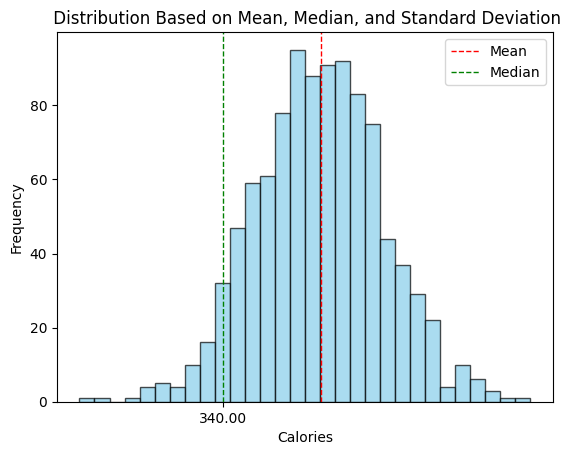

Lower Bound: -225.0
Upper Bound: 935.0
Outliers:
                                                            Item  Calories
31                 Big Breakfast with Hotcakes (Regular Biscuit)      1090
32                   Big Breakfast with Hotcakes (Large Biscuit)      1150
33  Big Breakfast with Hotcakes and Egg Whites (Regular Biscuit)       990
34    Big Breakfast with Hotcakes and Egg Whites (Large Biscuit)      1050
81                                  Chicken McNuggets (20 piece)       940
82                                  Chicken McNuggets (40 piece)      1880


In [75]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df = pd.read_csv(io.BytesIO(open('menu.csv', 'rb').read()))

df.dataframeName = 'menu.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

#check how many rows and columns we have in the data

# Clean the data
df.dropna()  # Drop rows with NaN values
df.fillna(0)  # Fill NaN values with a specified value

# Removing duplicates
df.drop_duplicates(inplace=True)

#take just the calories portion of the data for now
calories = df['Calories'].values

#print(calories)

mean_value = np.mean(calories)
std_dev = np.std(calories)
median_value = np.median(calories)

mean_value = "{:.2f}".format(mean_value)
std_dev = "{:.2f}".format(std_dev)
median_value = "{:.2f}".format(median_value)

print("Mean:", mean_value)
print("Standard Deviation:", std_dev)
print("Median:", median_value)


mean_value = float(mean_value)
std_dev = float(std_dev)

np.random.seed(50)
synthetic_data = np.random.normal(mean_value, std_dev, 1000)


plt.hist(synthetic_data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')

# Add vertical lines for mean and median
#plt.axvline(x=mean_value, color='red', linestyle='dashed', linewidth=1, label='Mean')
#plt.axvline(x=median_value, color='green', linestyle='dashed', linewidth=1, label='Median')

plt.axvline(x=mean_value, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(x=median_value, color='green', linestyle='dashed', linewidth=1, label='Median')

#plt.xticks(range(11))


# Add labels and title
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title(' Distribution Based on Mean, Median, and Standard Deviation')
plt.legend()



# Show the plot
plt.show()

# Calculate the Interquartile Range (IQR) for 'Calories'
Q1 = df['Calories'].quantile(0.25)
Q3 = df['Calories'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers based on the bounds
outliers = df[(df['Calories'] < lower_bound) | (df['Calories'] > upper_bound)]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers:")
print(outliers[['Item', 'Calories']])










